In [34]:
import pandas as pd

In [35]:
df=pd.read_csv("전처리저장용.csv")

In [36]:
thered= df[df["포맷"]=="RED"]
thered.to_csv("더레드조회용.csv")



In [37]:
thered_cate=thered.value_counts("카테고리")

In [38]:
thered_name=thered.value_counts("코스(상품) 이름")

In [39]:
thered_cate.to_csv("더레드 판매량(환불포함).csv")

In [40]:
theredun= thered.groupby("카테고리")
# 카테고리별로 분류된 데이터를 하나의 CSV 파일로 저장
theredun.apply(lambda x: x).to_csv("카테고리별_데이터.csv", encoding='utf-8')



In [41]:
thered2

,Unnamed: 0,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,월,일
13,13,2413849,PAYMENT,21862,204652,FASTCAMPUS,RED,프로그래밍,The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...,2022-12-31 23:12:29,-,264000.0,CARD,264000,0,264000,0,12,31
45,45,2413743,PAYMENT,5711,205222,FASTCAMPUS,RED,영상/3D,The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것,2022-12-31 23:12:54,[WELCOME] The RED 3만원할인,244000.0,CARD,214000,30000,214000,0,12,31
66,66,2413674,PAYMENT,340,212434,FASTCAMPUS,RED,프로그래밍,The RED : 현실 세상의 TDD 실전편 : 설계 확장성을 위한 코드 개선 방법...,2022-12-31 23:12:20,-,300000.0,CARD,300000,0,300000,0,12,31
84,84,2413615,PAYMENT,54023,204670,FASTCAMPUS,RED,마케팅,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,2022-12-31 23:12:51,[WELCOME] The RED 3만원할인,198000.0,TRANS,168000,30000,168000,0,12,31
96,96,2413582,PAYMENT,96445,210500,FASTCAMPUS,RED,디자인,The RED : Figma로 끝내는 모바일 UXUI 디자인 프로젝트 Kit,2022-12-31 23:12:51,[WELCOME] The RED 3만원할인,400000.0,CARD,370000,30000,370000,0,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145596,159257,1551823,PAYMENT,79588,208098,FASTCAMPUS,RED,프로그래밍,The RED : 모든 비즈니스를 성공으로 이끄는 Product Management...,2022-01-01 14:01:56,-,219000.0,CARD,219000,0,219000,0,1,1
145611,159272,1551765,PAYMENT,97288,205222,FASTCAMPUS,RED,영상/3D,The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것,2022-01-01 12:01:33,-,192000.0,CARD,192000,0,192000,0,1,1
145619,159280,1551713,PAYMENT,20322,203146,FASTCAMPUS,RED,프로그래밍,The RED : 현실 세상의 TDD by 이규원,2022-01-01 10:01:40,-,210000.0,CARD,210000,0,210000,0,1,1
145624,159285,1551692,PAYMENT,8325,208723,FASTCAMPUS,RED,데이터 사이언스,The RED : 우버처럼 하는 머신러닝 의사결정 by 정종빈,2022-01-01 10:01:42,-,249000.0,POINT,249000,0,249000,0,1,1


In [42]:
# 카테고리별로 '코스(상품) 이름'의 빈도수 계산
category_course_counts = thered.groupby('카테고리')['코스(상품) 이름'].value_counts()

# 결과를 CSV 파일로 저장
category_course_counts.to_csv("카테고리별_코스_빈도수.csv", encoding='utf-8')


In [43]:
theredun = thered[thered["유형"]=="PAYMENT"]
theredun_grouped = theredun.groupby('카테고리')['코스(상품) 이름'].value_counts()
# 카테고리별로 분류된 데이터를 하나의 CSV 파일로 저장
theredun_grouped.apply(lambda x: x).to_csv("카테고리별_데이터.csv2", encoding='utf-8')



# 더레드 인기강의들

 ### thered2는 환불을 제외한 결가값

In [44]:
thered2 = thered[thered["유형"]=="PAYMENT"]#더레드 인기강의들 

In [45]:
# '코스(상품) 이름'과 '카테고리'로 구성된 새로운 데이터프레임 생성
thered_category = thered2.drop_duplicates(['코스(상품) 이름', '카테고리'])[['코스(상품) 이름', '카테고리']].set_index('코스(상품) 이름')

# '코스(상품) 이름'의 빈도 계산
thered_name = thered2['코스(상품) 이름'].value_counts()

# 빈도수와 카테고리 결합
result = pd.concat([thered_category, thered_name], axis=1)

# 열 이름을 바꿈
result.rename(columns = {'코스(상품) 이름': '빈도수'}, inplace=True)

# 빈도수를 기준으로 내림차순 정렬
result = result.sort_values(by='count', ascending=False)

result.to_csv("더레드 인기강의.csv")


## 더레드 환불제거후 월별 강의겟수

In [46]:
import matplotlib as mpl
mpl.rcParams['font.family'] ='AppleGothic'

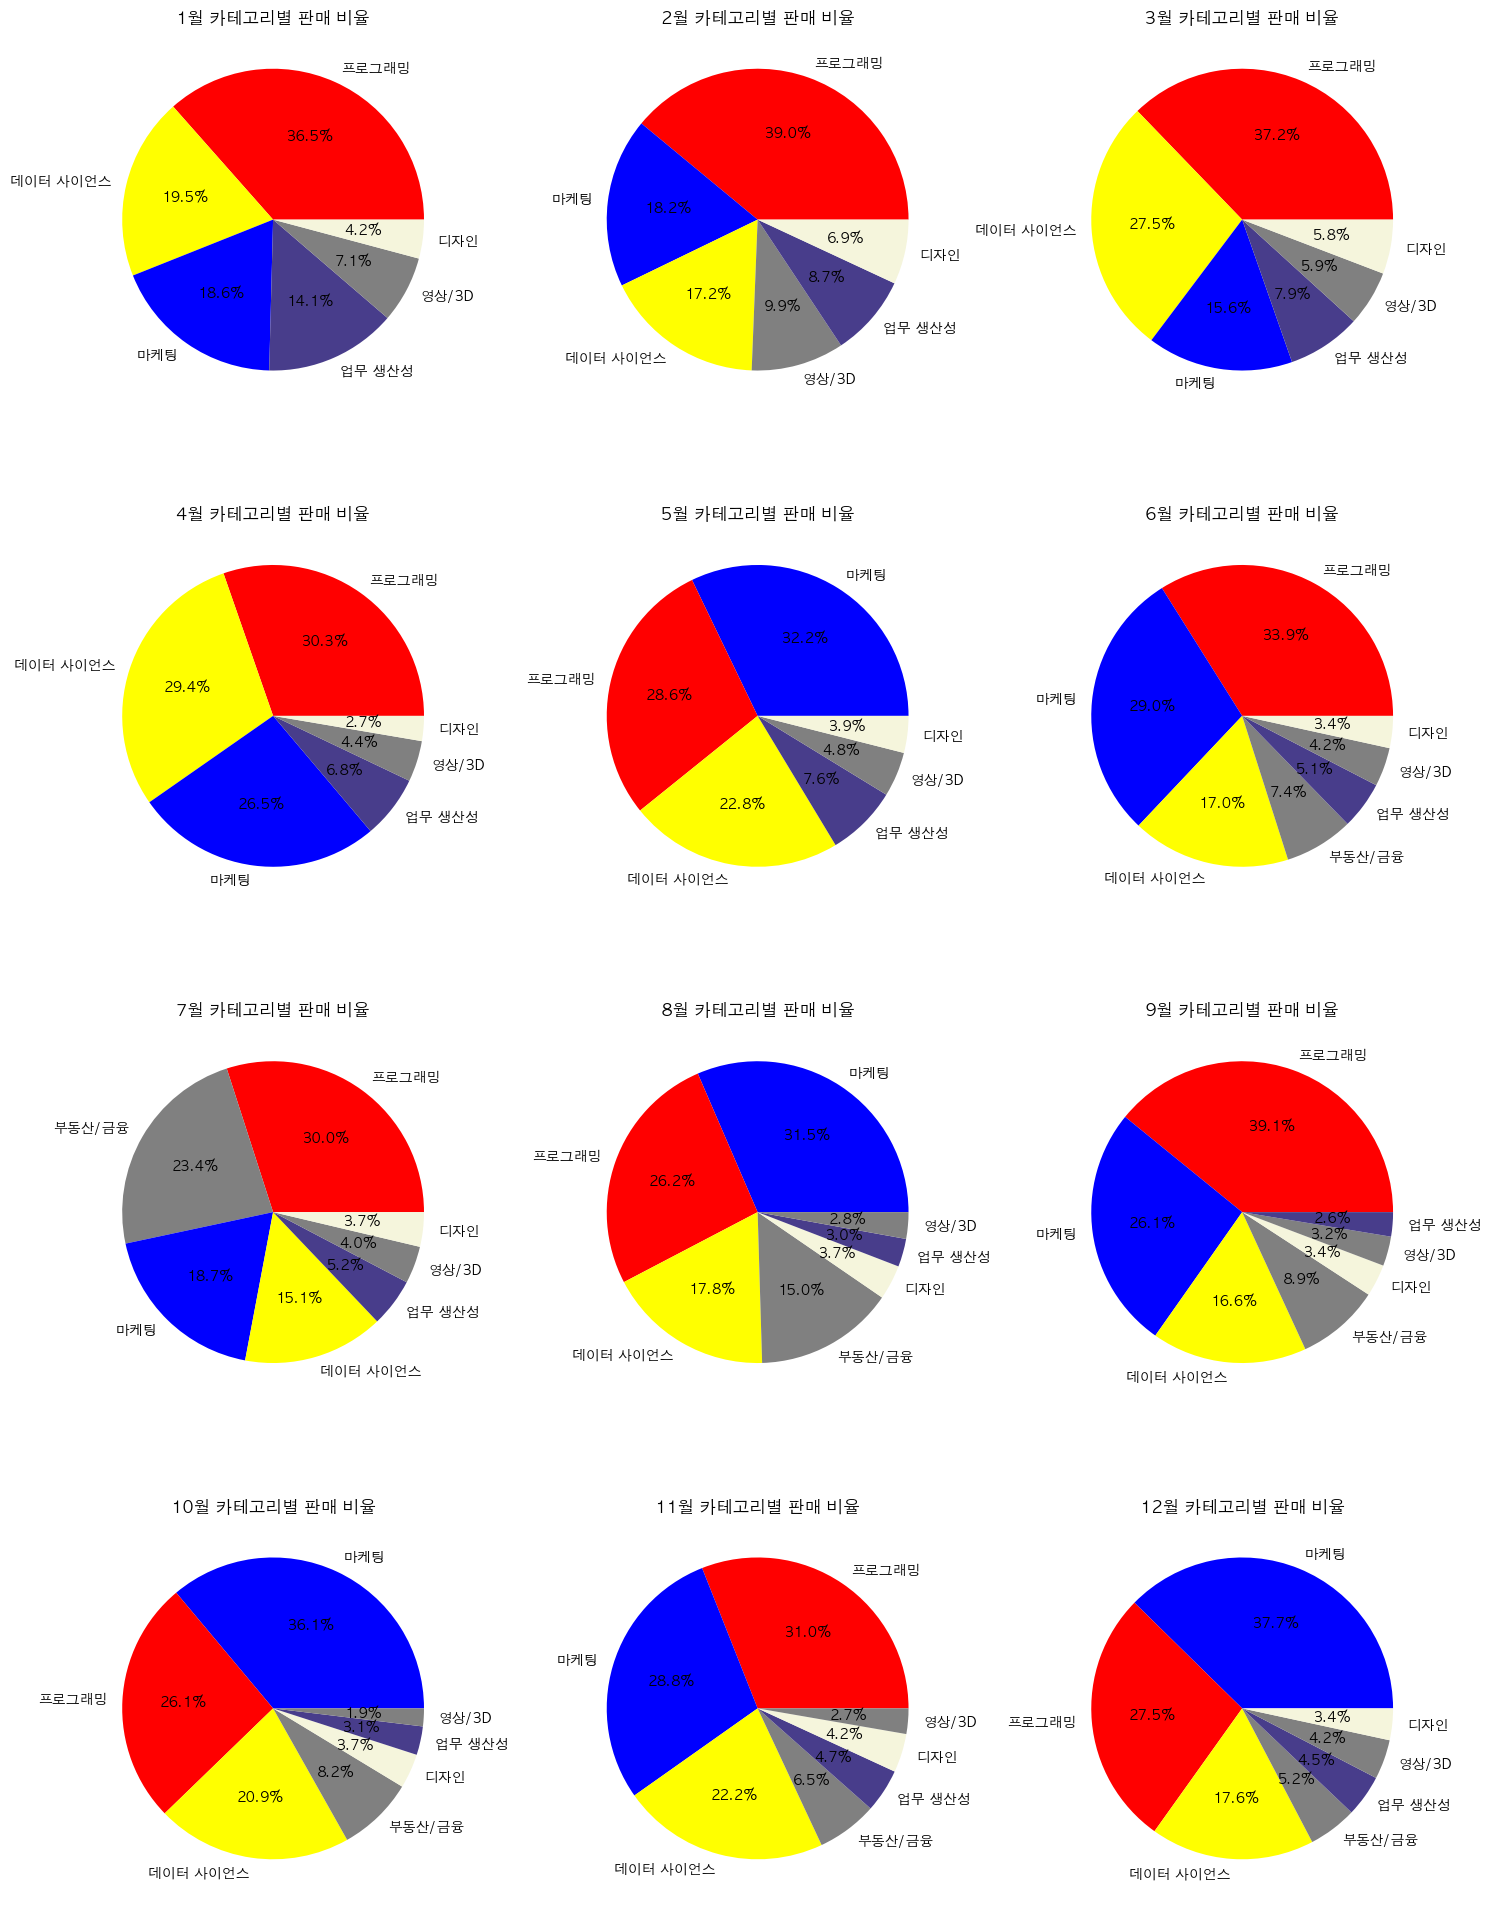

In [47]:
# import matplotlib.pyplot as plt

category_colors = {
    '마케팅': 'blue',
    '프로그래밍':'red',
    "데이터 사이언스":'yellow',
    "업무 생산성":'darkslateblue',
    "디자인":'beige',
    "영상3D":'magenta'
    # '마케팅': 'm',  # '마케팅' 카테고리가 두 번 지정되어 
}
fig, axs = plt.subplots(4, 3, figsize=(15, 20)) # 4x3 subplot 생성, 전체 크기는 15x20으로 설정

for month in range(1, 13):  # 1월부터 12월까지 반복
    # 해당 월의 데이터만 선택
    thered_month = thered[thered['월'] == month]
    
    # 카테고리별 빈도 계산 및 전체 행 수로 나누어 비율 계산
    category_ratio = thered_month['카테고리'].value_counts() / len(thered_month)
    
    # 결과를 DataFrame으로 변환
    category_ratio_df = category_ratio.reset_index()
    
    # 열 이름 변경
    category_ratio_df.columns = ['카테고리', '비율']
    
    # subplot의 위치 계산 (0부터 시작하는 인덱스를 사용)
    row = (month - 1) // 3
    col = (month - 1) % 3
    
  #카테고리에 대응하는 색상 리스트 생성 
    colors = [category_colors.get(category, 'gray') for category in category_ratio_df['카테고리']]
    # 해당 위치의 subplot에 원형 그래프 그리기
    axs[row, col].pie(category_ratio_df['비율'], labels=category_ratio_df['카테고리'], colors=colors, autopct='%1.1f%%')
    axs[row, col].set_title(f'{month}월 카테고리별 판매 비율')
    
plt.tight_layout()  # subplot 간의 간격 자동 조정
plt.show()


# 더레드 월별 판매 강의갯수 비율

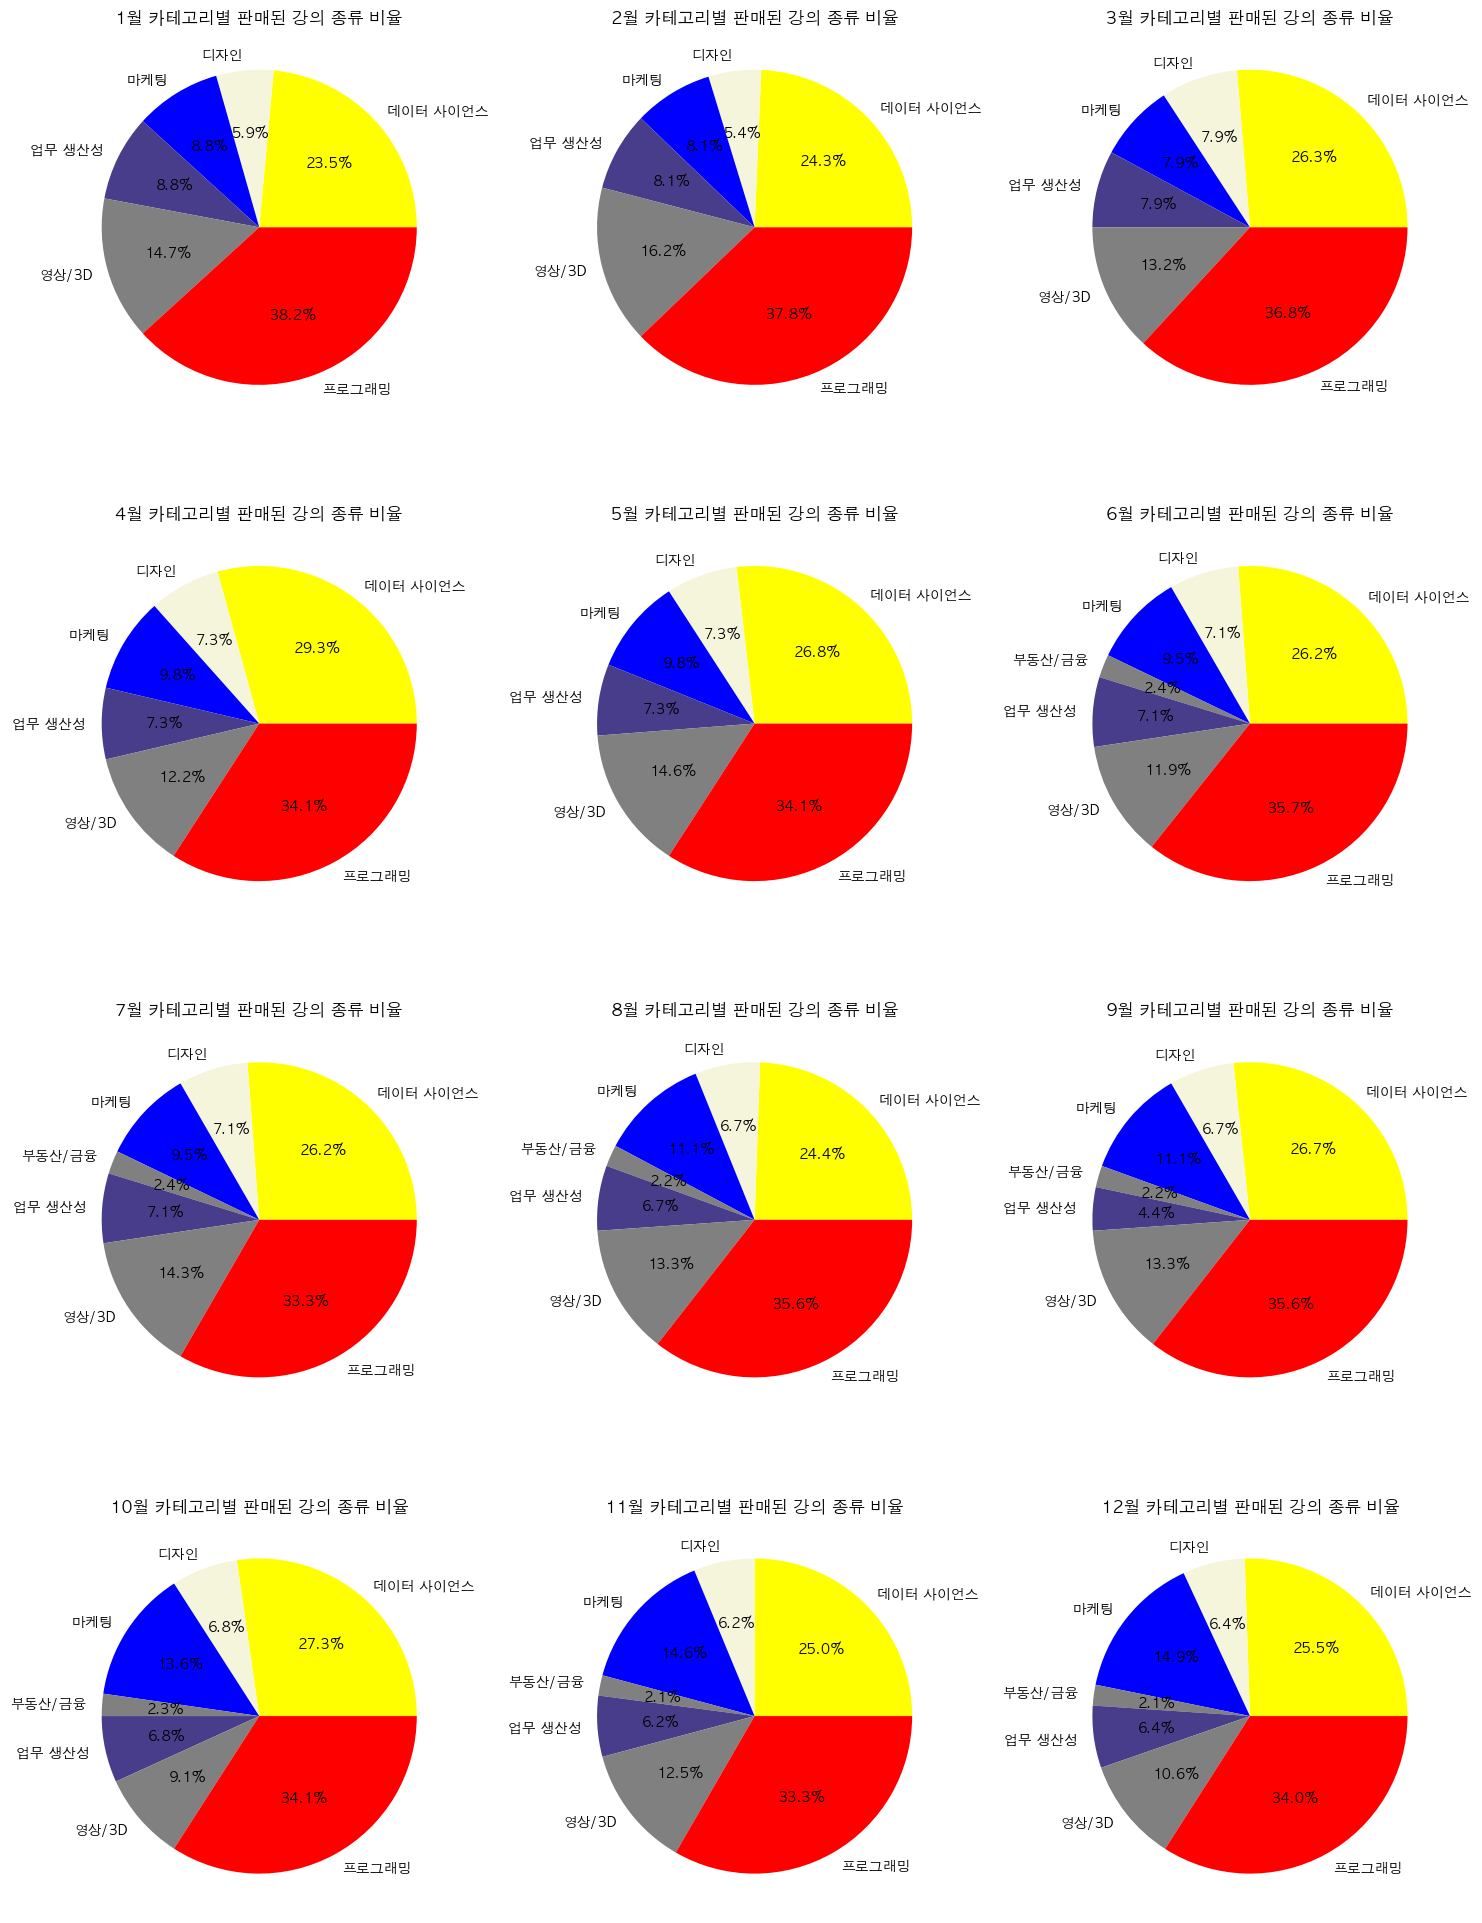

In [48]:
import matplotlib.pyplot as plt

category_colors = {
    '마케팅': 'blue',
    '프로그래밍':'red',
    "데이터 사이언스":'yellow',
    "업무 생산성":'darkslateblue',
    "디자인":'beige',
    "영상3D":'magenta'
}

fig, axs = plt.subplots(4, 3, figsize=(15, 20)) # 4x3 subplot 생성, 전체 크기는 15x20으로 설정

for month in range(1, 13):  # 1월부터 12월까지 반복
    # 해당 월의 데이터만 선택
    thered_month = thered[thered['월'] == month]
    
    # 카테고리별로 그룹화하고, 각 그룹에서 코스(상품) 이름의 고유한 값 개수를 계산
    category_courses_counts = thered_month.groupby('카테고리')['코스(상품) 이름'].nunique()
    
    # 카테고리별 판매된 강의 종류 비율 계산
    category_ratio = category_courses_counts / category_courses_counts.sum()
    
    # 결과를 DataFrame으로 변환
    category_ratio_df = category_ratio.reset_index()
    category_ratio_df.columns = ['카테고리', '비율']
    
    # subplot의 위치 계산 (0부터 시작하는 인덱스를 사용)
    row = (month - 1) // 3
    col = (month - 1) % 3
    
    # 해당 카테고리의 색상을 가져오거나, 지정된 색상이 없으면 기본 색상('grey')을 사용
    category_colors_in_month = [category_colors.get(category, 'grey') for category in category_ratio_df['카테고리']]
    
    # 해당 위치의 subplot에 원형 그래프 그리기
    axs[row, col].pie(category_ratio_df['비율'], labels=category_ratio_df['카테고리'], autopct='%1.1f%%', colors=category_colors_in_month)
    axs[row, col].set_title(f'{month}월 카테고리별 판매된 강의 종류 비율')
    
plt.tight_layout()  # subplot 간의 간격 자동 조정
plt.show()


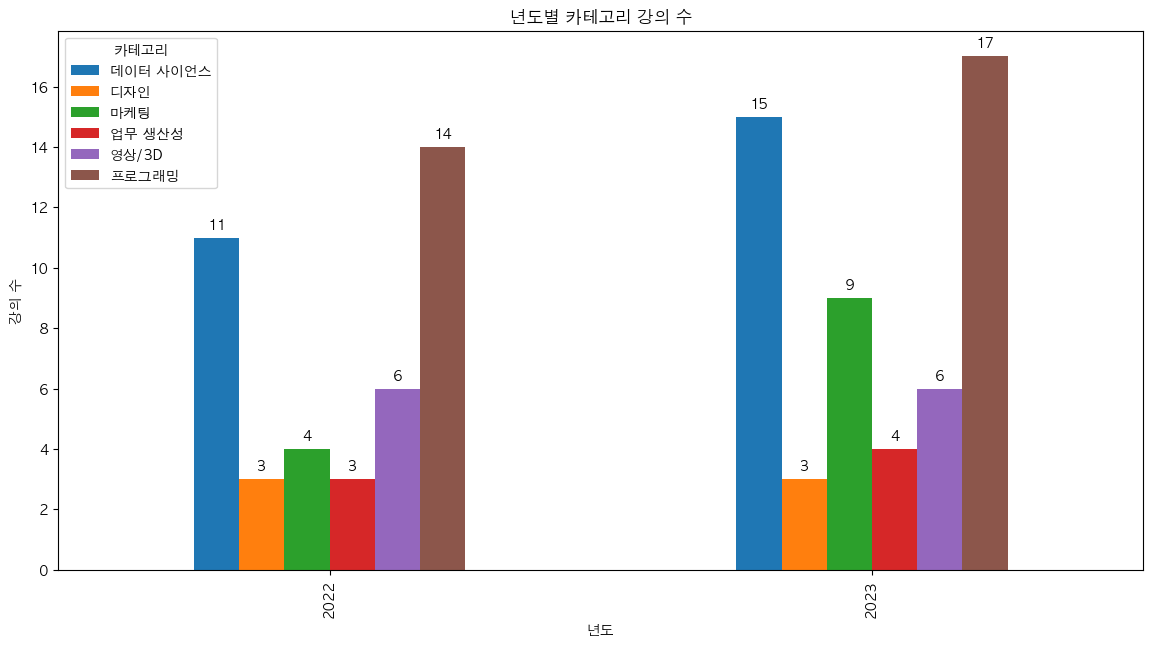

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
df_2022 = pd.read_csv('month_5_카테고리별_코스(상품) 이름 종류 수.csv')
df_2023 = pd.read_csv('2023현재 더레드 카테고리별 강의수.csv')

# 년도 컬럼 추가
df_2022['년도'] = 2022
df_2023['년도'] = 2023

# 두 데이터프레임 합치기
df = pd.concat([df_2022, df_2023])

# 년도와 카테고리별로 그룹화하고, 강의 수를 합산
df_grouped = df.groupby(['년도', '카테고리'])['코스(상품) 이름 종류 수'].sum().unstack()

# 막대그래프 그리기
ax = df_grouped.plot(kind='bar', figsize=(14, 7))

# 막대 위에 값 표시
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('년도별 카테고리 강의 수')
plt.xlabel('년도')
plt.ylabel('강의 수')
plt.show()

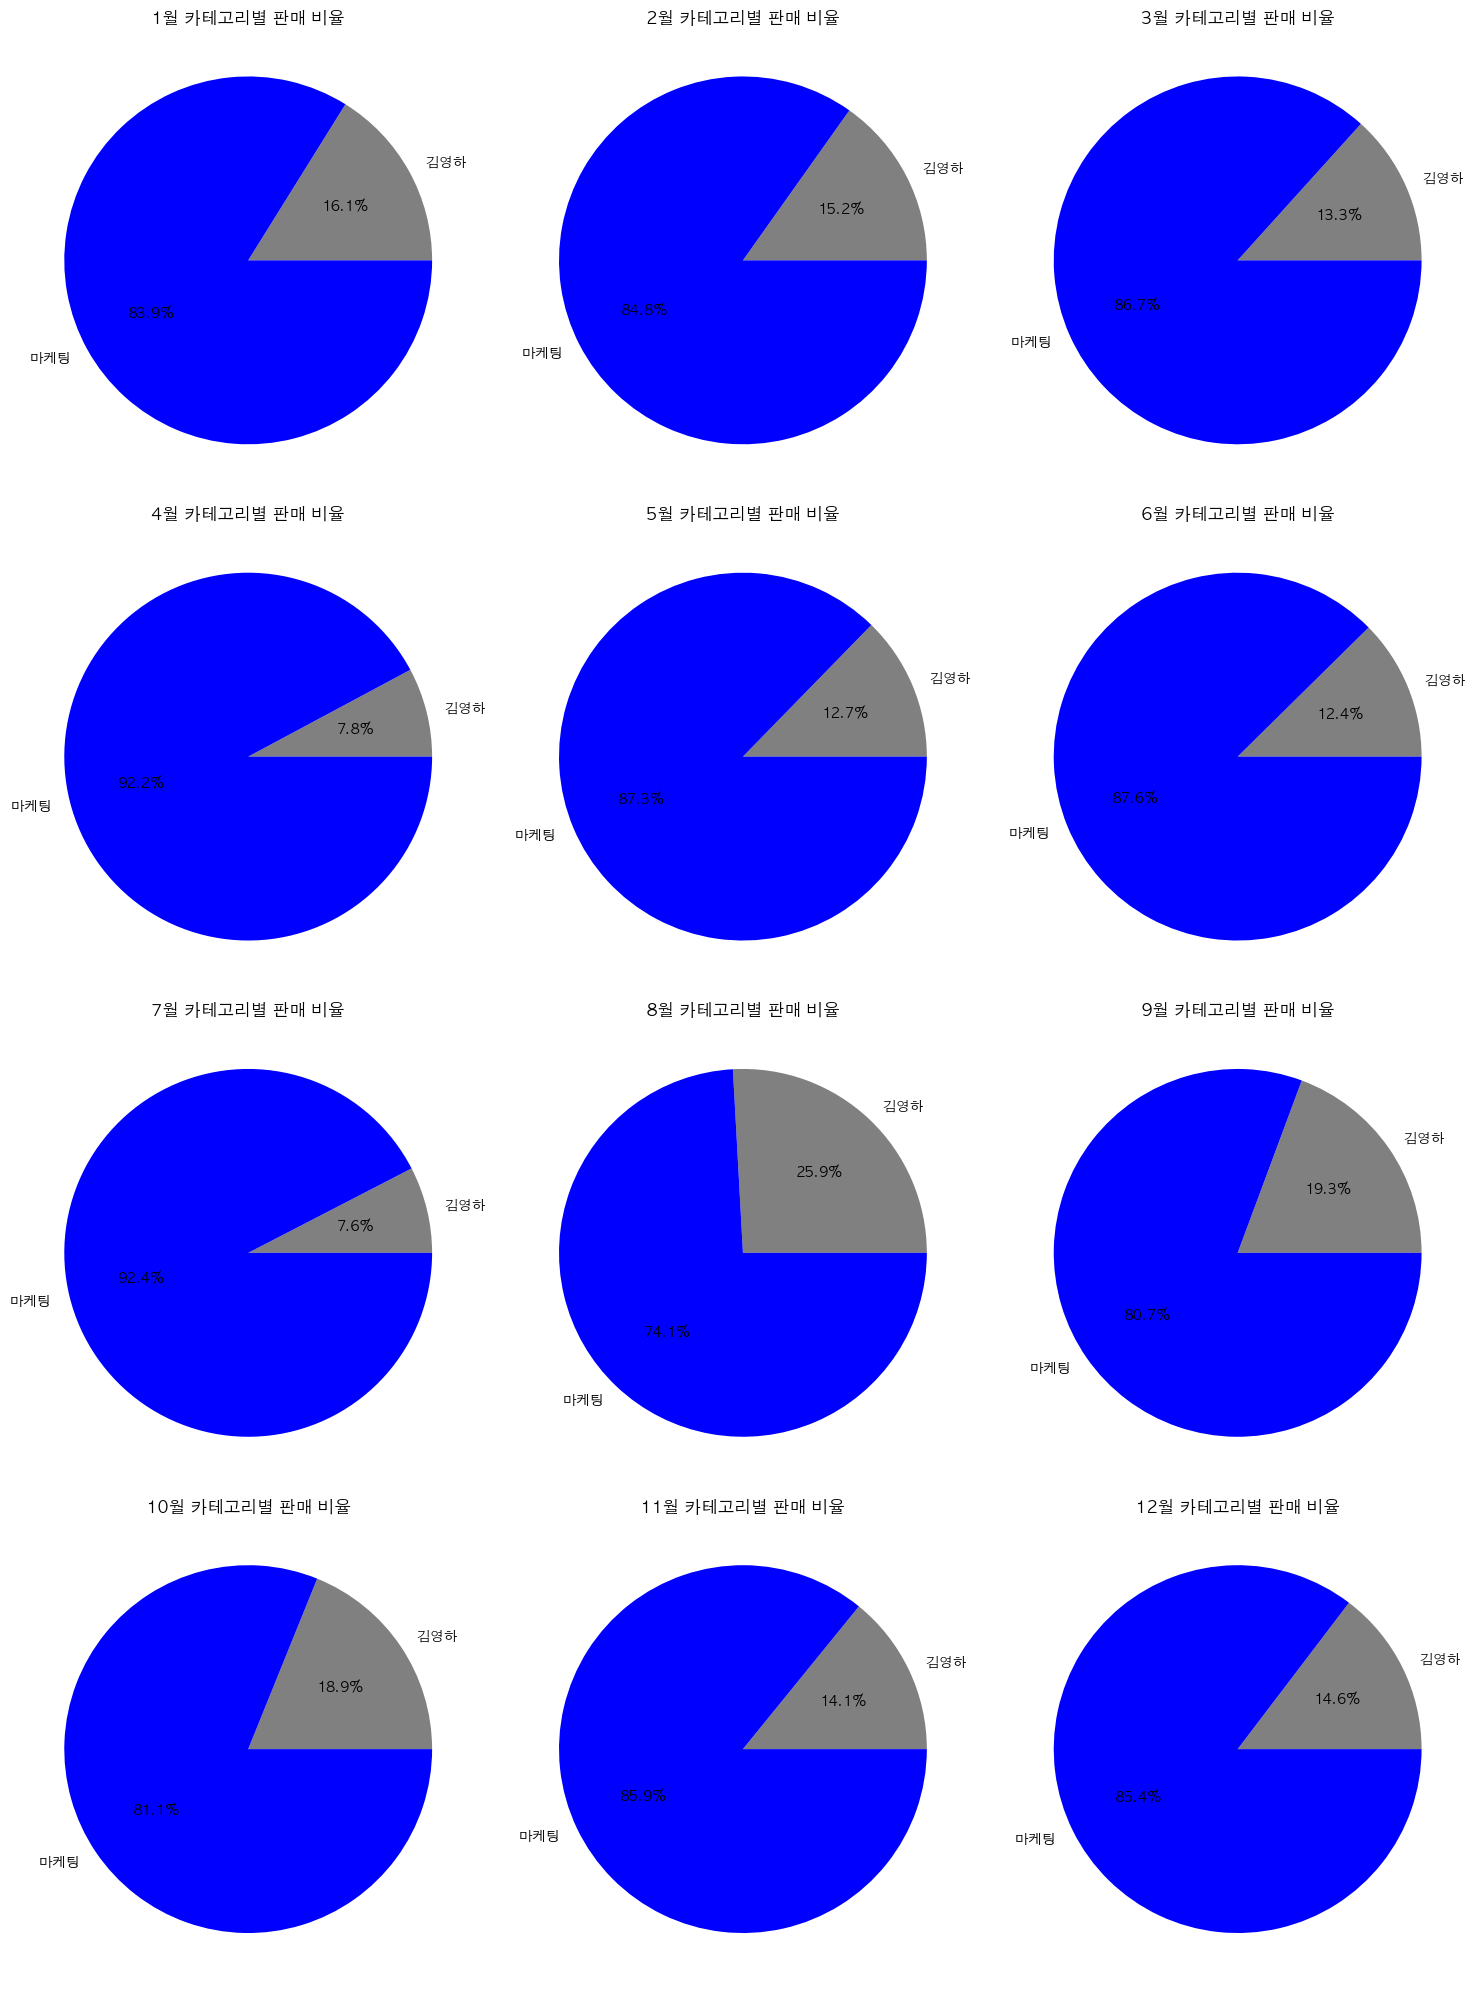

In [50]:
import matplotlib.pyplot as plt

category_colors = {
    '마케팅': 'blue',
    '프로그래밍': 'red',
    '데이터 사이언스': 'yellow',
    '업무 생산성': 'darkslateblue',
    '디자인': 'beige',
    '영상3D': 'magenta'
}

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for month in range(1, 13):
    thered_month = thered[thered['월'] == month]
    
    # '마케팅' 카테고리에서 김영하를 포함하는 데이터만 선택
    thered_marketing = thered_month[thered_month['카테고리'] == '마케팅']
    thered_kim_youngha = thered_marketing[thered_marketing['코스(상품) 이름'].str.contains('김영하')]
    
    # 김영하를 포함하는 경우와 포함하지 않는 경우로 나누어 비율 계산
    if len(thered_kim_youngha) > 0:
        kim_youngha_ratio = len(thered_kim_youngha) / len(thered_month)
        category_ratio = pd.Series([kim_youngha_ratio, 1 - kim_youngha_ratio], index=['김영하', '마케팅'])
    else:
        category_ratio = pd.Series([0, 1], index=['김영하', '마케팅'])
    
    # subplot의 위치 계산
    row = (month - 1) // 3
    col = (month - 1) % 3
    
    colors = [category_colors.get(category, 'gray') for category in category_ratio.index]
    axs[row, col].pie(category_ratio, labels=category_ratio.index, colors=colors, autopct='%1.1f%%')
    axs[row, col].set_title(f'{month}월 카테고리별 판매 비율')

plt.tight_layout()
plt.show()


## 2023 년과 비교해 부동산 키워드의 강의가 몇개 늘어놧는지를 보자
1. 전체 데이터에서 더레드를 제거한다

In [17]:

# 각 '카테고리'별 '코스(상품) 이름'의 유니크한 값들의 수를 확인
# 데이터 로드
df_dudong = pd.read_csv("실습데이터에 월 일 컬럼추가.csv")
df_dudong =df_dudong[df_dudong["포맷"]!="RED"]
df_dudong.to_csv("./noRED/더레드가 아닌 전체데이터.csv")

In [18]:
df_dudong

,Unnamed: 0,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,월,일
0,0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022-12-31 22:12:33,-,189000,TRANSFER,159000,-,159000,-,12,31
1,1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022-12-30 18:12:57,-,501000,TRANSFER,501000,-,501000,-,12,30
2,2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022-12-31 23:12:15,-,549000,CARD,549000,-,549000,-,12,31
3,3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022-12-31 23:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-,12,31
4,4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022-12-31 23:12:10,-,239000,CARD,239000,-,239000,-,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022-01-01 00:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-,1,1
159324,159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022-01-01 00:01:12,-,385000,CARD,385000,-,385000,-,1,1
159325,159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022-01-01 00:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-,1,1
159326,159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022-01-02 11:01:24,-,289000,VBANK,289000,-,289000,-,1,2


In [19]:
nored_uni = df_dudong.groupby('카테고리')['코스(상품) 이름'].unique()

# 유니크한 '코스(상품) 이름'을 문자열 형태로 변환
nored_uni_str = nored_uni.apply(lambda x: '\n'.join(x))

# 새로운 데이터프레임으로 만들기
df_unique = pd.DataFrame(nored_uni_str)

# CSV 파일로 저장
df_unique.to_csv('./noRED/카테고리확인용.csv')


In [20]:
category_colors

{'마케팅': 'blue',
 '프로그래밍': 'red',
 '데이터 사이언스': 'yellow',
 '업무 생산성': 'darkslateblue',
 '디자인': 'beige',
 '영상3D': 'magenta'}

In [21]:
#경로지정
your_path = "더레드헤체분석"

In [22]:
import os
import pandas as pd

output_dir = '더레드해체분석'  # 이 부분을 원하는 경로로 변경하세요.

for month in range(1, 13):  # 1월부터 12월까지 반복
    # 해당 월의 데이터만 선택
    thered_month = thered[thered['월'] == month]
    
    # 카테고리별 빈도 계산
    category_counts = thered_month['카테고리'].value_counts()
    
    # 결과를 DataFrame으로 변환
    category_counts_df = category_counts.reset_index()
    
    # 열 이름 변경
    category_counts_df.columns = ['카테고리', '카운트']

    # 결과를 엑셀 파일로 저장
    output_path = os.path.join(output_dir, f'month_{month}_월별카운트.csv')
    category_counts_df.to_csv(output_path, index=False)


In [23]:
thered

,Unnamed: 0,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,월,일
13,13,2413849,PAYMENT,21862,204652,FASTCAMPUS,RED,프로그래밍,The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...,2022-12-31 23:12:29,-,264000.0,CARD,264000,0,264000,0,12,31
45,45,2413743,PAYMENT,5711,205222,FASTCAMPUS,RED,영상/3D,The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것,2022-12-31 23:12:54,[WELCOME] The RED 3만원할인,244000.0,CARD,214000,30000,214000,0,12,31
66,66,2413674,PAYMENT,340,212434,FASTCAMPUS,RED,프로그래밍,The RED : 현실 세상의 TDD 실전편 : 설계 확장성을 위한 코드 개선 방법...,2022-12-31 23:12:20,-,300000.0,CARD,300000,0,300000,0,12,31
84,84,2413615,PAYMENT,54023,204670,FASTCAMPUS,RED,마케팅,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,2022-12-31 23:12:51,[WELCOME] The RED 3만원할인,198000.0,TRANS,168000,30000,168000,0,12,31
96,96,2413582,PAYMENT,96445,210500,FASTCAMPUS,RED,디자인,The RED : Figma로 끝내는 모바일 UXUI 디자인 프로젝트 Kit,2022-12-31 23:12:51,[WELCOME] The RED 3만원할인,400000.0,CARD,370000,30000,370000,0,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145596,159257,1551823,PAYMENT,79588,208098,FASTCAMPUS,RED,프로그래밍,The RED : 모든 비즈니스를 성공으로 이끄는 Product Management...,2022-01-01 14:01:56,-,219000.0,CARD,219000,0,219000,0,1,1
145611,159272,1551765,PAYMENT,97288,205222,FASTCAMPUS,RED,영상/3D,The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것,2022-01-01 12:01:33,-,192000.0,CARD,192000,0,192000,0,1,1
145619,159280,1551713,PAYMENT,20322,203146,FASTCAMPUS,RED,프로그래밍,The RED : 현실 세상의 TDD by 이규원,2022-01-01 10:01:40,-,210000.0,CARD,210000,0,210000,0,1,1
145624,159285,1551692,PAYMENT,8325,208723,FASTCAMPUS,RED,데이터 사이언스,The RED : 우버처럼 하는 머신러닝 의사결정 by 정종빈,2022-01-01 10:01:42,-,249000.0,POINT,249000,0,249000,0,1,1


## 월 카테고리별실체 팔린 갯수

In [24]:
import os
import pandas as pd
output_dir = '더레드해체분석' 
  # 이 부분을 원하는 경로로 변경하세요.

for month in range(1, 13):  # 1월부터 12월까지 반복
    # 해당 월의 데이터만 선택
    thered_month = thered[thered['월'] == month]
    
    # 카테고리별로 그룹화하고, 각 그룹에서 코스(상품) 이름의 고유한 값 추출
    category_courses = thered_month.groupby('카테고리')['코스(상품) 이름'].unique()
    
    # 결과를 DataFrame으로 변환
    category_courses_df = category_courses.reset_index()
    
    # 결과를 CSV 파일로 저장
    output_path = os.path.join(output_dir, f'month_{month}_월별실제판매된_카테고리별 종류.csv')
    category_courses_df.to_csv(output_path, index=False)


## 더 레드 월 별 팔린 카테고리 강의 갯수


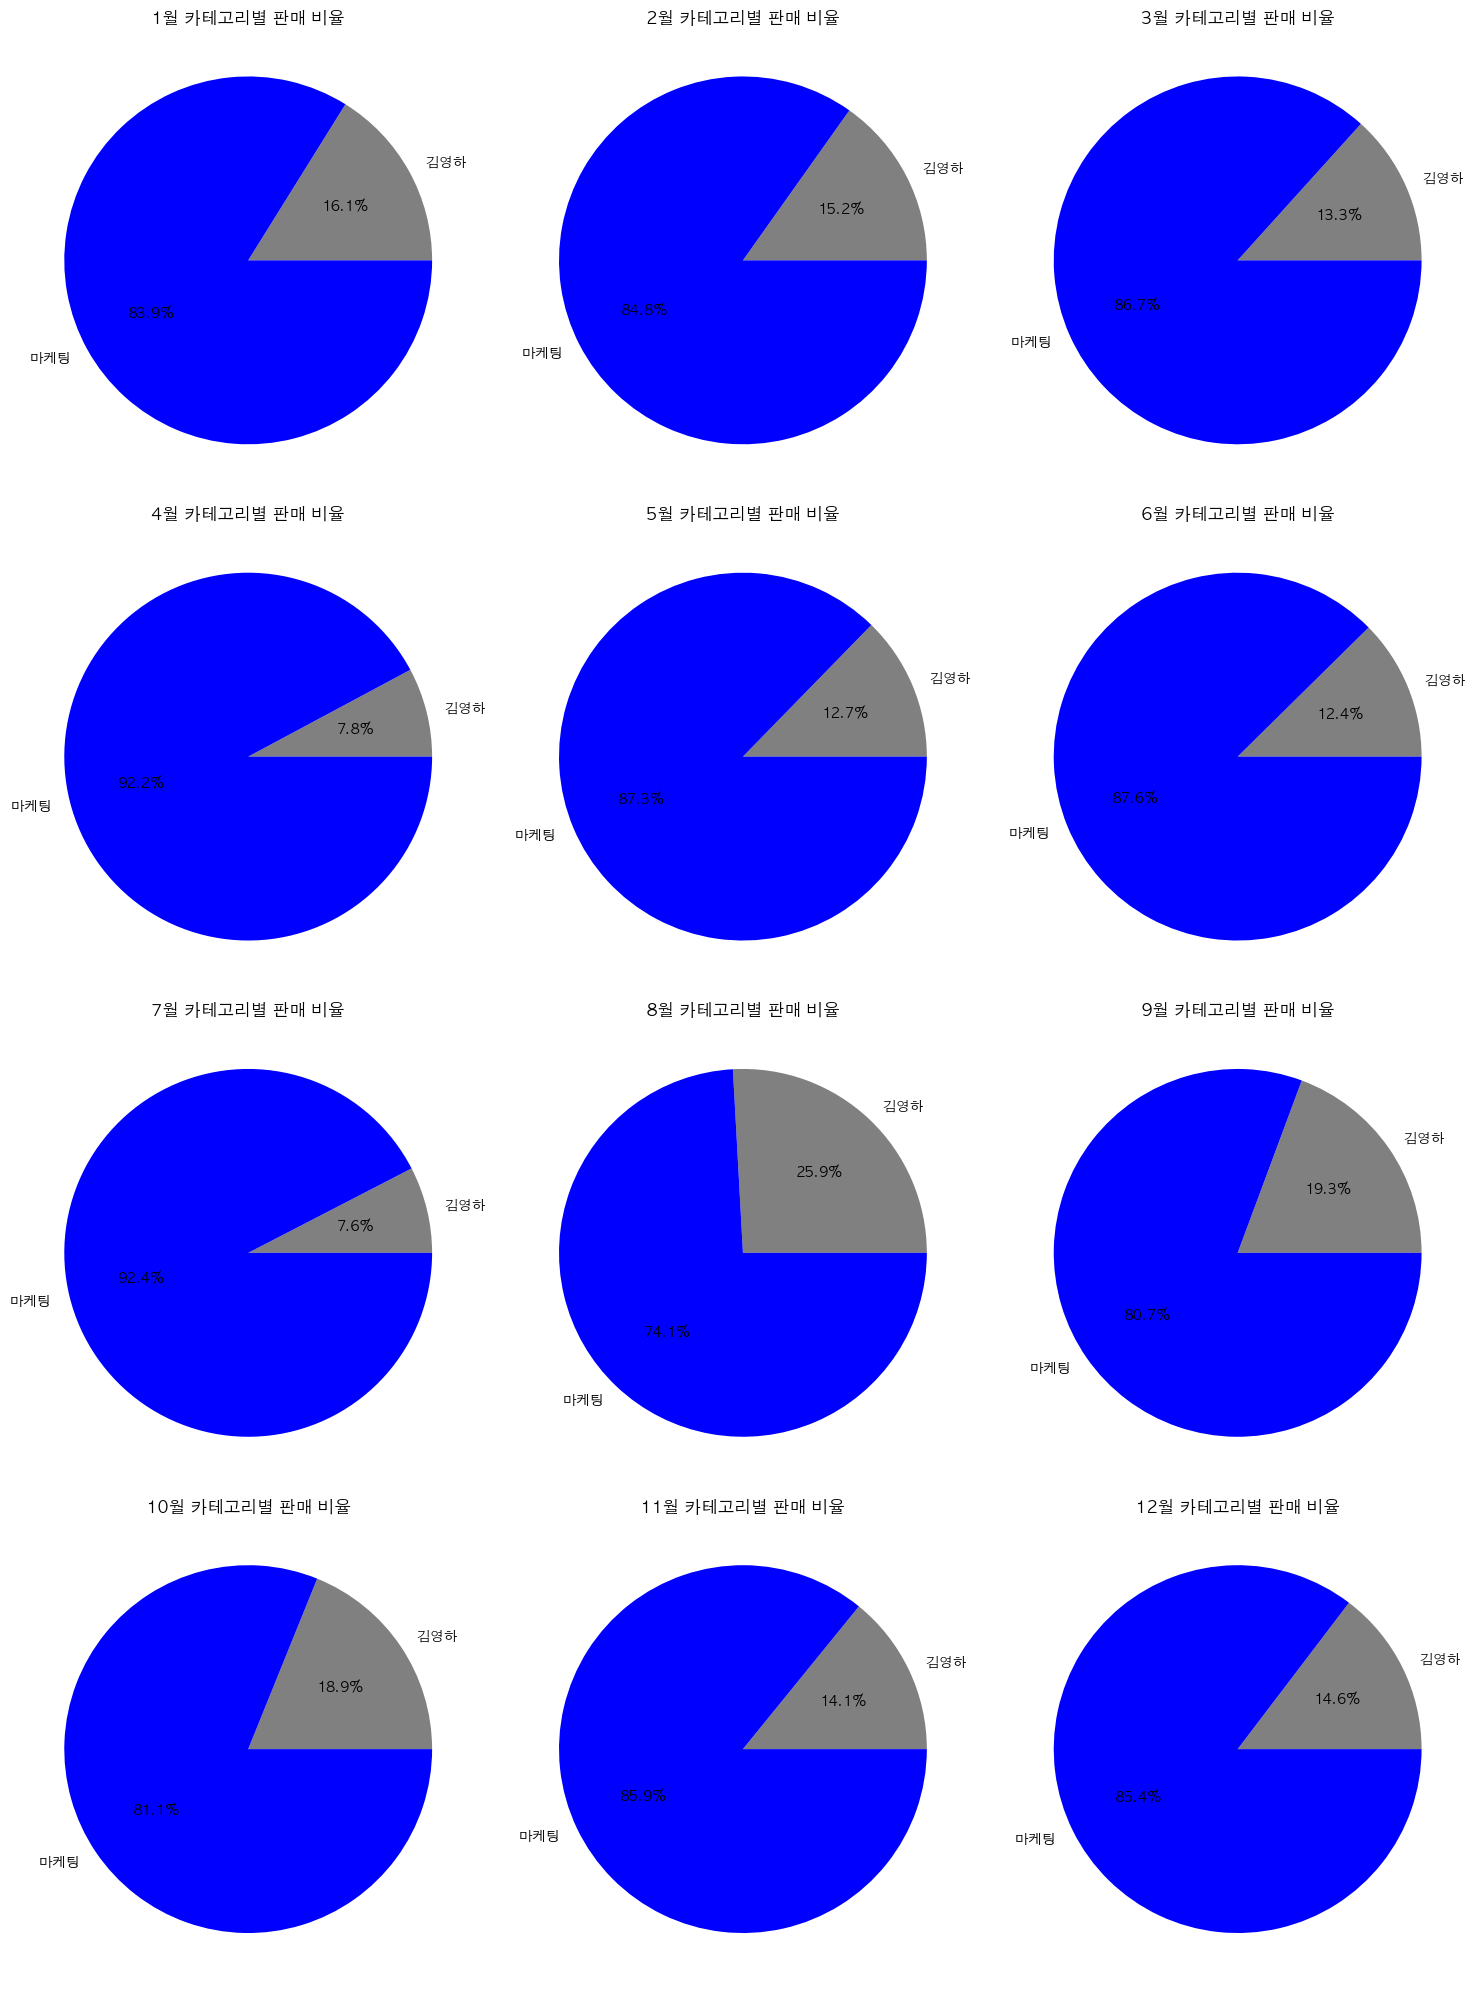

In [25]:
import matplotlib.pyplot as plt

category_colors = {
    '마케팅': 'blue',
    '프로그래밍': 'red',
    '데이터 사이언스': 'yellow',
    '업무 생산성': 'darkslateblue',
    '디자인': 'beige',
    '영상3D': 'magenta'
}

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for month in range(1, 13):
    thered_month = thered[thered['월'] == month]
    
    # '마케팅' 카테고리에서 김영하를 포함하는 데이터만 선택
    thered_marketing = thered_month[thered_month['카테고리'] == '마케팅']
    thered_kim_youngha = thered_marketing[thered_marketing['코스(상품) 이름'].str.contains('김영하')]
    
    # 김영하를 포함하는 경우와 포함하지 않는 경우로 나누어 비율 계산
    if len(thered_kim_youngha) > 0:
        kim_youngha_ratio = len(thered_kim_youngha) / len(thered_month)
        category_ratio = pd.Series([kim_youngha_ratio, 1 - kim_youngha_ratio], index=['김영하', '마케팅'])
    else:
        category_ratio = pd.Series([0, 1], index=['김영하', '마케팅'])
    
    # subplot의 위치 계산
    row = (month - 1) // 3
    col = (month - 1) % 3
    
    colors = [category_colors.get(category, 'gray') for category in category_ratio.index]
    axs[row, col].pie(category_ratio, labels=category_ratio.index, colors=colors, autopct='%1.1f%%')
    axs[row, col].set_title(f'{month}월 카테고리별 판매 비율')

plt.tight_layout()
plt.show()
